In [1]:
import numpy as np
from matplotlib import pyplot as plt
import idx2numpy
import random as rand
from NCD import *
from PIL import Image
import cv2 as cv2
import pandas as pd

# gnist is a class that opens ubyte image files and reads them. 

To initialize gnist, you need to input the image and label paths, otherwise it defaults.  
Might be able to convert the entire app folder and attach it to this class

In [2]:
class gnist:
    def __init__(self, image_path = None, label_path = None):
        ###    Set Image/Label Path otherwise it defaults to the handwritten digits file
        if (not image_path and not label_path):
            image_path = './lib/train-images.idx3-ubyte'
            label_path = './lib/train-labels.idx1-ubyte'
        #Import images directly with the idx2numpy library
        #Using the initialized function to call the image is not recommended as it's the raw image file, prior to preproccessing the image for fliffpress
        (self.images, self.labels) = (idx2numpy.convert_from_file(image_path), idx2numpy.convert_from_file(label_path))
    
    def show(self, index):
        #Function allows you to call a particular image from the dataset using it's index. 
        if not isinstance(index, int):
            raise TypeError('index requires int')
            
        #Binarize the image
        thresh, grayImage = cv2.threshold(self.images[index], 0, 255, cv2.THRESH_BINARY) #work around gray2ind
        image = grayImage; label = self.labels[index];
        plt.figure;
        plt.imshow(image, cmap = 'gray')
        plt.title('Label: ' + str(label), fontsize = 20, fontweight = 'bold');
        return image
    
    def training(self, nsamples):
        if not isinstance(nsamples, int):
            raise TypeError('nsamples requires int')
            
        Training = [];
        Stored = [];
        while len(Training) < nsamples *10:
            i = round(len(self.images)*rand.random())
            
            if (self.images[i].all, self.labels[i].all) in Training:
                #Check if the data set was  already inputed into the dataset
                continue
                
            if Stored.count(self.labels[i]) >= nsamples:
                #Maintain Uniform distribution of true labels
                continue
                
            nt = {}
            #### Preprocess image
            thresh, grayImage = cv2.threshold(self.images[i], 0, 255, cv2.THRESH_BINARY) #work around gray2ind
            nt['label'] = self.labels[i]
            nt['im'] = grayImage
            nt['i'] = i
            Stored.append(self.labels[i])
            Training.append(nt)
        return np.asarray(Training)
    
    def getmnist(self, targ, cardinality):
        if not (isinstance(targ, np.ndarray) or isinstance(targ, list)):
            raise TypeError("Input Targ requires list or numpy array")
        target = np.asarray(targ) if isinstance(targ, list) else targ
        #Import Training Set using gnist().training
        M = self.training(cardinality)
        
        Training = sorted(M, key = lambda i: i['label'])
        reTrain = []; idxGT = [];
        
        for index in Training:
            if index['label'] in target:
                reTrain.append(index)
                idxGT.append(index['label']+1)
        return np.asarray(reTrain), np.asarray(idxGT)
    
    def mnistdistance(self, Training):
        d = np.zeros((len(Training), len(Training)))
        for i in range(len(Training)):
            for j in range(len(Training)):
                if (i == j):
                    continue
                d[i,j] = imNCDM([Training[i]['im'], Training[j]['im']])
        return Regularize(d)[0]

# Demo imNCDM

0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9649122807017544


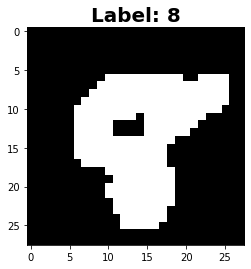

In [7]:
im = [gnist().show(21057), gnist().show(30794), gnist().show(24108)]
for i in range(500):
    if i % 100 == 0: 
        print(imNCDM(im))

# Demo: getmnist:

Input Target, takes either lists or numpy arrays. If it's a list input, it gets converted back into a numpy array

In [4]:
target = [0,1]
cardinality = 10;
TrainSet, idxGT = gnist().getmnist(target, cardinality)

# Demo: mnistdistance:
Note, still WIP, given that I need to parallize the for loop. Running this code under 100 iterations takes forever without it.
Also note, that this takes in the dictionary input from getmnist or training. Otherwise this function will not work

In [5]:
test = gnist().mnistdistance(TrainSet)
pd.DataFrame(test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,1.111111,0.962963,1.115385,1.071429,1.111111,1.068966,1.115385,1.000000,0.961538,1.230769,1.115385,1.307692,1.153846,1.192308,1.192308,1.153846,1.115385,1.115385,1.153846
1,1.111111,0.000000,1.111111,1.111111,1.071429,1.111111,1.068966,1.185185,1.148148,0.962963,1.148148,1.074074,1.222222,1.111111,1.148148,1.185185,1.111111,1.074074,1.074074,1.111111
2,0.962963,1.111111,0.000000,1.074074,1.107143,1.074074,1.000000,1.148148,1.111111,0.888889,1.185185,1.074074,1.222222,1.148148,1.148148,1.148148,1.111111,1.111111,1.111111,1.111111
3,1.115385,1.111111,1.074074,0.000000,1.071429,1.074074,1.034483,1.153846,1.000000,1.000000,1.192308,1.076923,1.230769,1.115385,1.192308,1.192308,1.115385,1.115385,1.115385,1.153846
4,1.071429,1.071429,1.107143,1.071429,0.000000,1.107143,0.965517,1.107143,1.107143,1.107143,1.178571,1.142857,1.214286,1.142857,1.142857,1.142857,1.107143,1.142857,1.107143,1.071429
5,1.111111,1.111111,1.074074,1.074074,1.107143,0.000000,1.068966,1.185185,0.962963,0.962963,1.185185,1.074074,1.259259,1.111111,1.185185,1.148148,1.111111,1.111111,1.111111,1.111111
6,1.068966,1.068966,1.000000,1.034483,0.965517,1.068966,0.000000,1.103448,1.034483,1.034483,1.172414,1.103448,1.241379,1.137931,1.172414,1.172414,1.103448,1.103448,1.103448,1.172414
7,1.115385,1.185185,1.148148,1.153846,1.107143,1.185185,1.103448,0.000000,0.961538,1.153846,1.230769,1.076923,1.307692,1.153846,1.192308,1.192308,1.153846,1.153846,1.115385,1.115385
8,1.000000,1.148148,1.111111,1.000000,1.107143,0.962963,1.034483,0.961538,0.000000,1.000000,1.230769,1.115385,1.269231,1.153846,1.230769,1.230769,1.153846,1.115385,1.153846,1.192308
9,0.961538,0.962963,0.888889,1.000000,1.107143,0.962963,1.034483,1.153846,1.000000,0.000000,1.192308,1.076923,1.230769,1.115385,1.153846,1.153846,1.115385,1.076923,1.115385,1.115385
